In [1]:
# 导入必要的库
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# 避免一些烦人的提示和警
# 导入matplotlib库-绘图库
import matplotlib.pyplot as plt

import pandas as pd

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来显示正常负号

In [2]:
# 导入数据集-鸢尾花数据集
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
print(iris.columns)
# 花萼长度 花萼宽度 花瓣长度 花瓣宽度 种类

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [4]:
iris.info()
# 没有数据缺失

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 鸢尾花数据集可视化

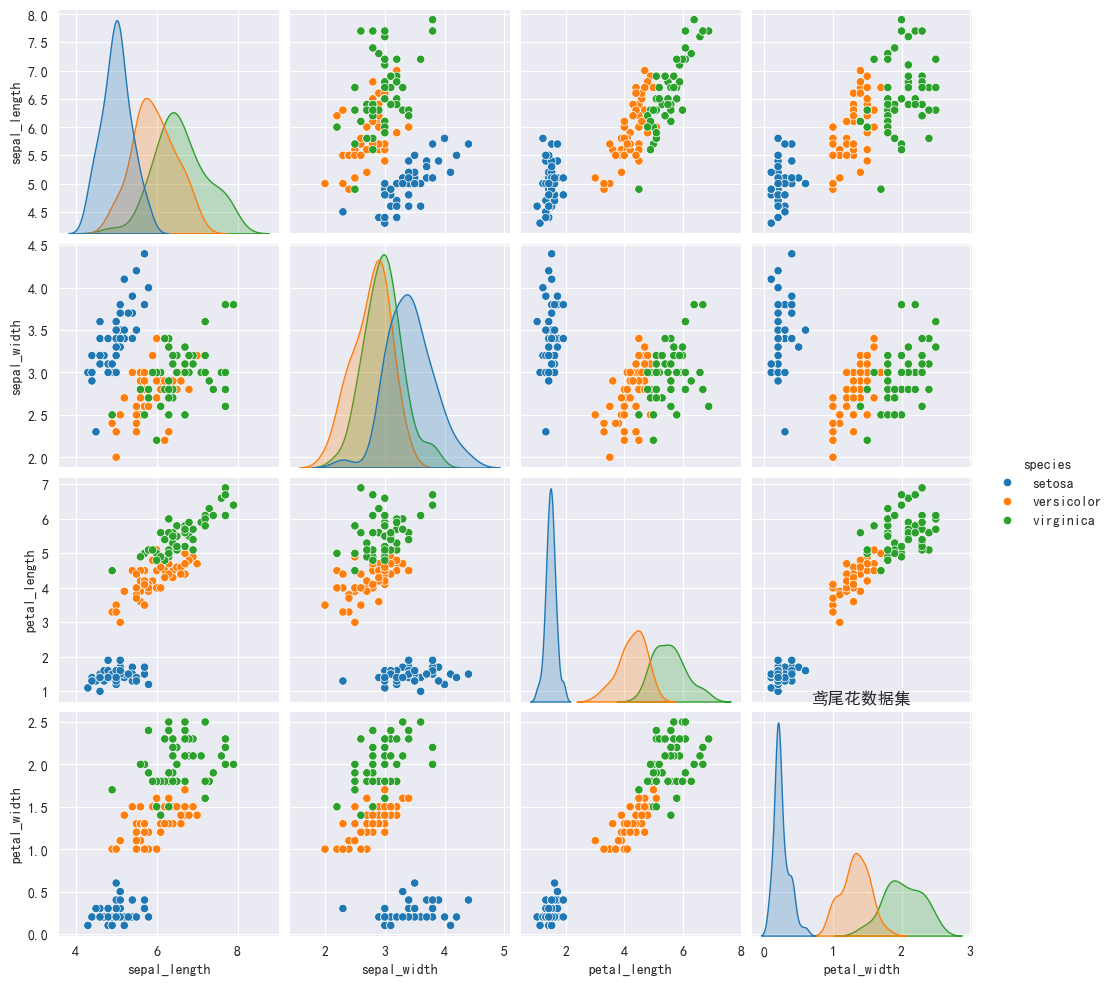

In [6]:
# 可视化数据分布的成对图
sns.pairplot(iris, hue='species')
plt.title("鸢尾花数据集")
plt.show()

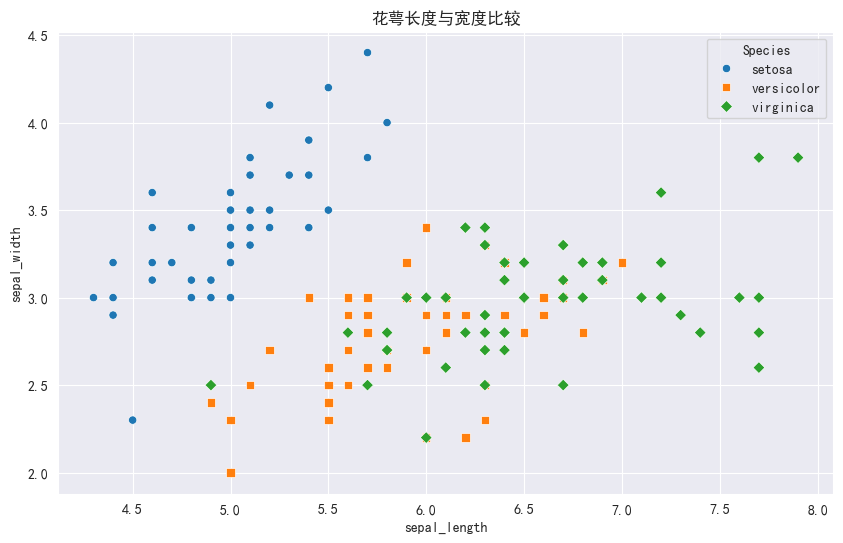

In [7]:
# 可视化不同特征之间的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', style='species', markers=["o", "s", "D"])
# 不同种类花萼之间的比较
plt.title("花萼长度与宽度比较")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend(title="Species")
plt.show()


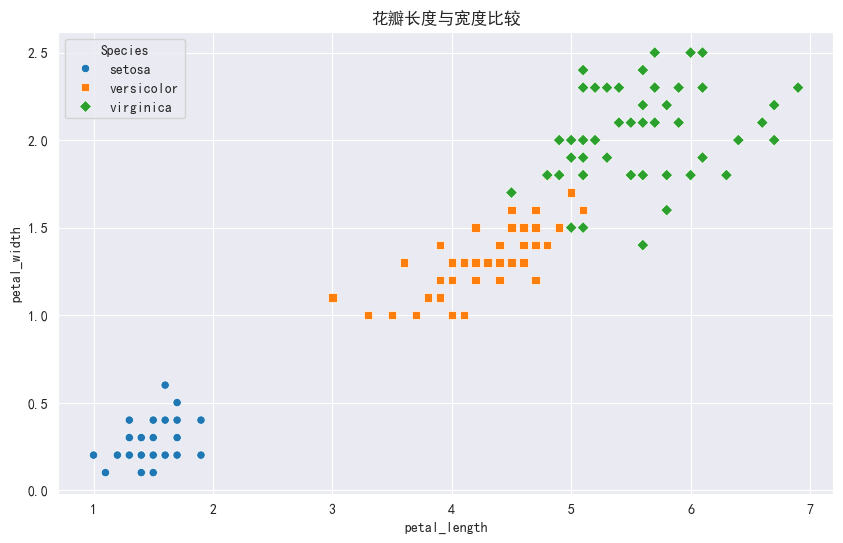

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', style='species', markers=["o", "s", "D"])
# 不同种类花瓣之间的比较
plt.title("花瓣长度与宽度比较")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend(title="Species")
plt.show()

# 逻辑回归-假设函数

$$
h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
$$

# 逻辑回归-代价函数

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_{(i)} \log(h_\theta(x_{(i)})) + (1 - y_{(i)}) \log(1 - h_\theta(x_{(i)})) \right]
$$

In [9]:
 # 定义函数
def load_data():
    # 使用pandas加载数据集，
    # 显式指定列名
    column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    iris = pd.read_csv('iris.csv', names=column_names, header=0)  # 加载数据并指定列名
    # 选择前两类（setosa 和 versicolor）进行二分类
    iris = iris[iris['species'].isin(['setosa', 'versicolor'])]
    X = iris.iloc[:, :2].values  # 取特征，只取前两列
    # 将目标变量与 'virginica' 进行比较，返回的是 0 或 1。
    y = (iris['species'] == 'versicolor').astype(int)  # 将目标变量转为0和1
    return X, y

In [10]:
# 2. 定义逻辑回归模型与代价函数
def sigmoid(z):
    # sigmoid 函数
    # np.exp(-z)-->e^(-z)
    return 1 / (1 + np.exp(-z))

# 模型预测函数
def predict(X, weights):
    # 矩阵点积
    return sigmoid(np.dot(X, weights))
# 代价函数
def compute_loss(X, y, weights):
    m = y.shape[0]
    predictions = predict(X, weights)
    # 符号使得将梯度上升算法转换为梯度下降算法
    loss = -np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions)) / m
    return loss

In [11]:
# 3. 实现梯度下降算法
     # 学习率 迭代次数
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    # 构建长度为n的数组
    # 初始化模型权重weights为0
    weights = np.zeros(n)
    # 辅助列表，存储每次迭代的代价函数值
    losses = []

    for iterations in range(iterations):
        predictions = predict(X, weights)
        errors = predictions - y
        gradients = np.dot(X.T, errors) / m
        # 更新参数
        weights -= learning_rate * gradients
        
        # 记录损失
        if iterations % 100 == 0:
            loss = compute_loss(X, y, weights)
            losses.append(loss)
            print(f'Iterations {iterations}, Loss: {loss:.4f}')

    return weights, losses

In [12]:
# 4. 训练模型
def train_logistic_regression():
    X, y = load_data()
    # 添加偏置项（截距）
    X = np.c_[np.ones(X.shape[0]), X]  # 在X的第一列添加1
    weights, losses = gradient_descent(X, y, learning_rate=0.1, iterations=1000)
    return weights, losses

if __name__ == "__main__":
    weights, losses = train_logistic_regression()
    print("Final weights:", weights)

Iterations 0, Loss: 0.6859
Iterations 100, Loss: 0.3498
Iterations 200, Loss: 0.2443
Iterations 300, Loss: 0.1943
Iterations 400, Loss: 0.1649
Iterations 500, Loss: 0.1456
Iterations 600, Loss: 0.1317
Iterations 700, Loss: 0.1213
Iterations 800, Loss: 0.1132
Iterations 900, Loss: 0.1066
Final weights: [-0.70858625  3.04837482 -5.11154035]


In [13]:
# 5. 绘制图表
def plot_losses(losses):
    plt.plot(losses)
    plt.title("代价曲线")
    plt.xlabel("迭代次数 ")
    plt.ylabel("代价函数值")
    plt.show()

In [14]:
# 绘图函数
def plot_decision_boundary(X, y, weights):
    # 绘制决策边界图
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100))
    # 拼接列表
    Z = sigmoid(np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()] @ weights)
    Z = Z.reshape(xx.shape)
    
    # 绘制决策边界图
    plt.contourf(xx, yy, Z, levels=[0, 0.5], cmap="coolwarm", alpha=0.8)
    # 绘制数据点
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k", marker="o")
    plt.title("决策边界和数据点")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

Iterations 0, Loss: 0.6859
Iterations 100, Loss: 0.3498
Iterations 200, Loss: 0.2443
Iterations 300, Loss: 0.1943
Iterations 400, Loss: 0.1649
Iterations 500, Loss: 0.1456
Iterations 600, Loss: 0.1317
Iterations 700, Loss: 0.1213
Iterations 800, Loss: 0.1132
Iterations 900, Loss: 0.1066


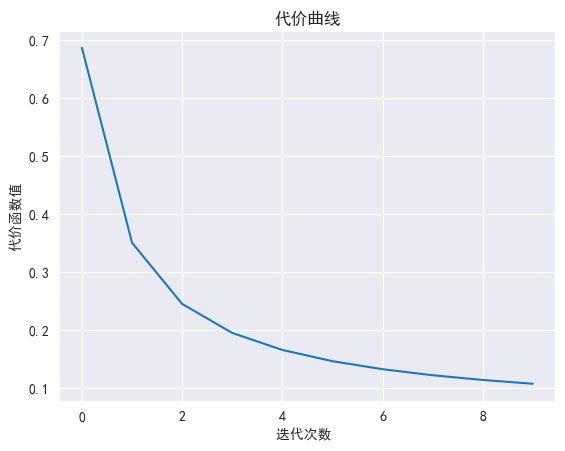

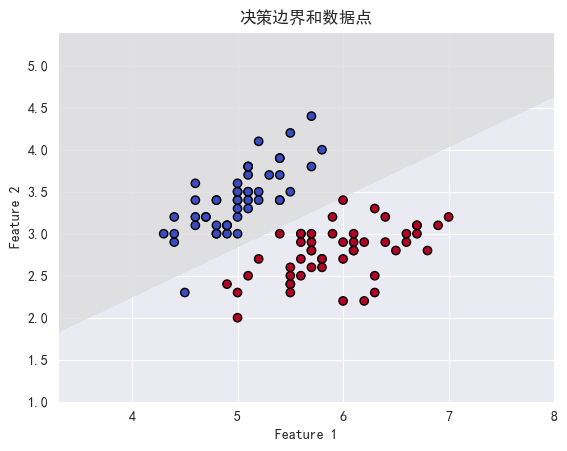

In [15]:
# 主函数
# 语句的目的是确保只有在脚本作为主程序运行时，才执行其中的代码，而不是在该脚本被当作模块导入时执行。
if __name__ == "__main__":
    weights, losses, = train_logistic_regression()
    X, y = load_data()
    # 绘制损失曲线
    plot_losses(losses)

    # 绘制决策边界
    plot_decision_boundary(X, y, weights)